In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/titanic_train.csv


In [2]:
train = pd.read_csv("/kaggle/input/titanic/titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
import seaborn as sb
import matplotlib.pyplot as plt

<AxesSubplot:>

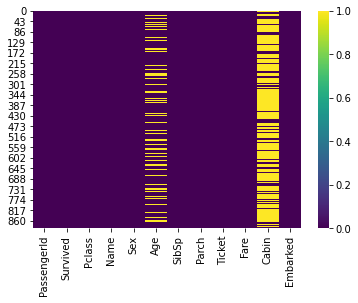

In [5]:
sb.heatmap(train.isnull(),cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

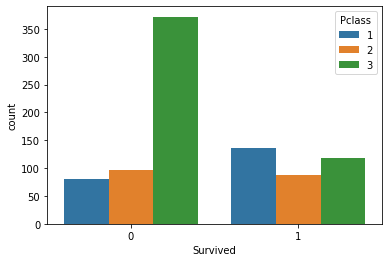

In [6]:
sb.countplot(x='Survived',data=train,hue='Pclass')

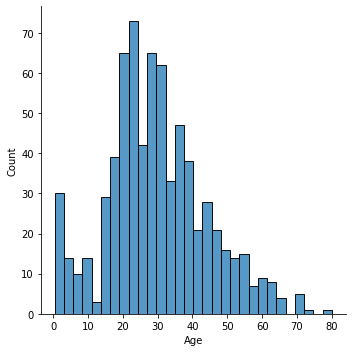

In [7]:
sb.displot(train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

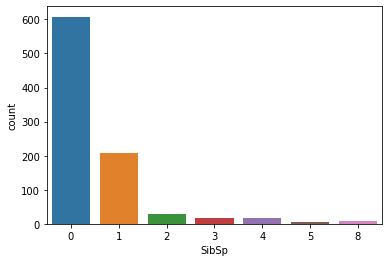

In [8]:
sb.countplot(x='SibSp',data=train)

<AxesSubplot:>

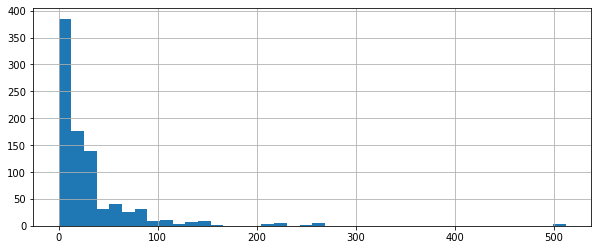

In [9]:
train['Fare'].hist(bins=40,figsize=(10,4))

***data cleaning***


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

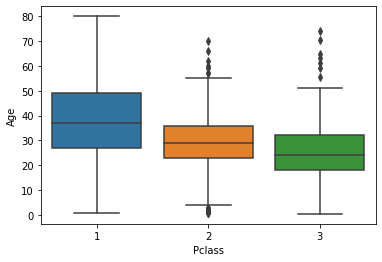

In [10]:
sb.boxplot(x='Pclass',y='Age',data=train)

In [11]:
def impute_age(cols):
    Age=cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 24
        else:
            return 24
    else:
        return Age


In [12]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

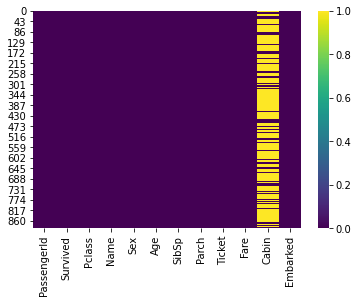

In [13]:
sb.heatmap(train.isnull(),cmap='viridis')

In [14]:
train.info()
train.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [15]:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

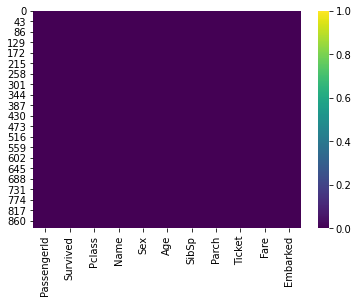

In [16]:
sb.heatmap(train.isnull(),cmap='viridis')

In [17]:
Sex=pd.get_dummies(train['Sex'],drop_first=True)

In [18]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [19]:
train = pd.concat([train,Sex,embark],axis=1)
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1,0,1


In [20]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [21]:
train.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.25,1,0,1


***Training Model***

In [22]:
from sklearn.model_selection import train_test_split as tts


In [23]:
x = train.drop('Survived',axis=1)
y= train['Survived']

In [24]:
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=0.3,random_state=101)

In [25]:
from sklearn.linear_model import LogisticRegression as Lr

In [28]:
logmod = Lr(solver='liblinear')

In [29]:
logmod.fit(xtrain,ytrain)

LogisticRegression(solver='liblinear')

In [31]:
prediction = logmod.predict(xtest)

In [35]:
from sklearn.metrics import classification_report as cReport
from sklearn.metrics import confusion_matrix as cFReport


In [34]:
print(cReport(ytest,prediction))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [36]:
cFReport(ytest,prediction)

array([[133,  21],
       [ 40,  74]])